<a href="https://colab.research.google.com/github/deadlysixx/Redu-o-de-Dimensionalidade-de-Imagem/blob/main/conversor_imagem_ppm_gray_bin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
script = """
def ler_ppm(caminho):
    with open(caminho, 'rb') as f: # Open in binary read mode
        formato = f.readline().strip().decode('ascii') # Decode header lines
        linha = f.readline().strip().decode('ascii') # Decode header lines
        while linha.startswith('#'):
            linha = f.readline().strip().decode('ascii') # Decode header lines
        largura, altura = map(int, linha.split())
        max_valor = int(f.readline().strip().decode('ascii')) # Decode header lines
        pixels = []
        if formato == 'P3':
            dados = f.read().split() # Read remaining data as bytes
            for i in range(0, len(dados), 3):
                r = int(dados[i].decode('ascii')) # Decode pixel values
                g = int(dados[i+1].decode('ascii')) # Decode pixel values
                b = int(dados[i+2].decode('ascii')) # Decode pixel values
                pixels.append((r, g, b))
        elif formato == 'P6':
            dados = f.read() # Read remaining data as bytes
            for i in range(0, len(dados), 3):
                r = dados[i]
                g = dados[i+1]
                b = dados[i+2]
                pixels.append((r, g, b))
        else:
            raise ValueError(f"Só suporta formatos P3 ou P6, encontrado: {formato}")

    return largura, altura, max_valor, pixels

def salvar_ppm_gray(caminho, largura, altura, max_valor, pixels_gray):
    with open(caminho, 'w') as f:
        f.write('P2\\n')
        f.write(f'{largura} {altura}\\n')
        f.write(f'{max_valor}\\n')
        for i, val in enumerate(pixels_gray):
            f.write(f'{val} ')
            if (i + 1) % largura == 0:
                f.write('\\n')

def salvar_ppm_bin(caminho, largura, altura, max_valor, pixels_bin):
    salvar_ppm_gray(caminho, largura, altura, max_valor, pixels_bin)

def rgb_para_gray(pixels):
    pixels_gray = []
    for r, g, b in pixels:
        gray = int(0.299 * r + 0.587 * g + 0.114 * b)
        pixels_gray.append(gray)
    return pixels_gray

def binarizar(pixels_gray, limiar=128):
    pixels_bin = []
    for val in pixels_gray:
        if val > limiar:
            pixels_bin.append(255)
        else:
            pixels_bin.append(0)
    return pixels_bin

if __name__ == "__main__":
    import sys
    if len(sys.argv) < 2:
        print("Uso: python converter.py caminho_da_imagem.ppm")
        sys.exit(1)

    caminho_entrada = sys.argv[1]
    caminho_gray = 'imagem_gray.pgm'
    caminho_bin = 'imagem_bin.pgm'

    largura, altura, max_valor, pixels = ler_ppm(caminho_entrada)
    pixels_gray = rgb_para_gray(pixels)
    pixels_bin = binarizar(pixels_gray, limiar=128)

    salvar_ppm_gray(caminho_gray, largura, altura, max_valor, pixels_gray)
    salvar_ppm_bin(caminho_bin, largura, altura, max_valor, pixels_bin)

    print("Imagem em tons de cinza salva em", caminho_gray)
    print("Imagem binarizada salva em", caminho_bin)
"""

with open('converter.py', 'w') as f:
    f.write(script)

print("Script 'converter.py' criado com sucesso!")

Script 'converter.py' criado com sucesso!


In [2]:
from google.colab import files

print("Faça upload da sua imagem PPM (formato P3):")
uploaded = files.upload()

nome_arquivo = list(uploaded.keys())[0]
print(f"Arquivo enviado: {nome_arquivo}")


Faça upload da sua imagem PPM (formato P3):


Saving salada.ppm to salada.ppm
Arquivo enviado: salada.ppm


In [8]:
!python3 converter.py "salada.ppm"

Imagem em tons de cinza salva em imagem_gray.pgm
Imagem binarizada salva em imagem_bin.pgm


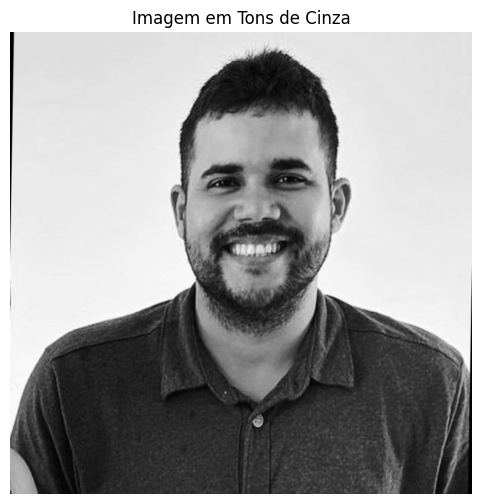

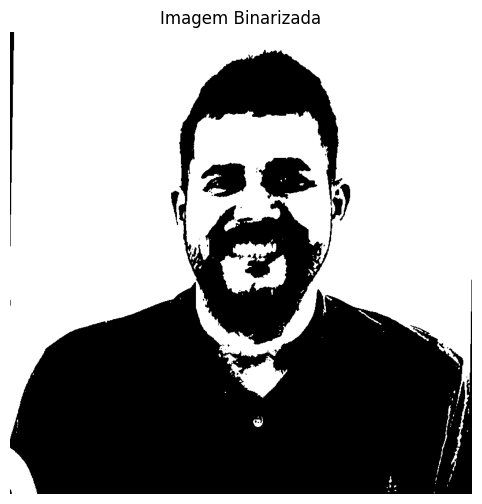

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def carregar_pgm(caminho):
    with open(caminho, 'r') as f:
        formato = f.readline().strip()
        if formato != 'P2':
            raise ValueError('Formato não suportado (esperado P2)')
        linha = f.readline()
        while linha.startswith('#'):
            linha = f.readline()
        largura, altura = map(int, linha.strip().split())
        max_valor = int(f.readline().strip())

        dados = []
        for line in f:
            dados.extend(line.strip().split())

        dados = list(map(int, dados))
        img = np.array(dados).reshape((altura, largura))
        return img

img_gray = carregar_pgm('imagem_gray.pgm')
plt.figure(figsize=(8,6))
plt.title('Imagem em Tons de Cinza')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

img_bin = carregar_pgm('imagem_bin.pgm')
plt.figure(figsize=(8,6))
plt.title('Imagem Binarizada')
plt.imshow(img_bin, cmap='gray')
plt.axis('off')
plt.show()